### Made by Aditya Khamitkar for AI club Task Round.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle
import numpy as np
from sklearn.neural_network import MLPClassifier

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(X_test_scaled)

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# output of evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [17]:
# Save the logistic regression model using pickle
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)

# Load the logistic regression model
with open('logistic_regression_model.pkl', 'rb') as f:
    logistic_regression_model = pickle.load(f)


### Training a neural network with 3 hidden layers using the extracted weights and biases as initializations.

In [18]:
# Extracting weights and biases from the logistic regression model
weights = np.hstack([logistic_regression_model.intercept_[:, None], logistic_regression_model.coef_])
# Note: You may need to reshape weights and biases based on the neural network's architecture.

# Define and train a neural network with 3 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', max_iter=1000)
mlp_classifier.fit(X_train_scaled, y_train)

# Evaluate the neural network
accuracy_nn = mlp_classifier.score(X_test_scaled, y_test)
print("Accuracy of the neural network:", accuracy_nn)

Accuracy of the neural network: 1.0


#### Making Plots LR vs NN

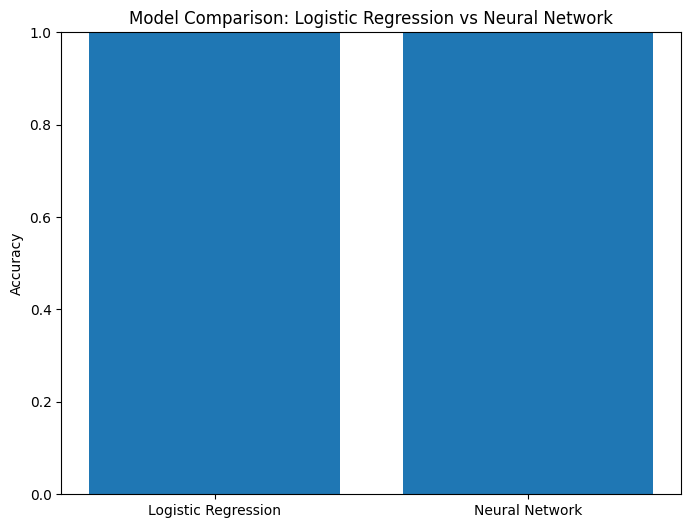

In [19]:
# Evaluate the neural network
accuracy_nn = mlp_classifier.score(X_test_scaled, y_test)

# Plot accuracy of the neural network
plt.figure(figsize=(8, 6))
plt.bar(['Logistic Regression', 'Neural Network'], [accuracy, accuracy_nn])
plt.ylim(0, 1)
plt.title('Model Comparison: Logistic Regression vs Neural Network')
plt.ylabel('Accuracy')
plt.show()


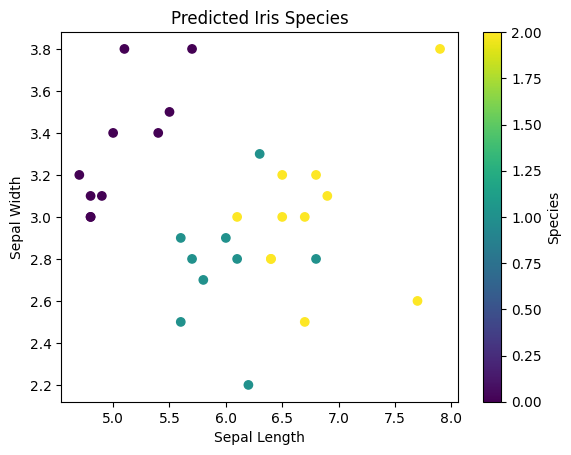

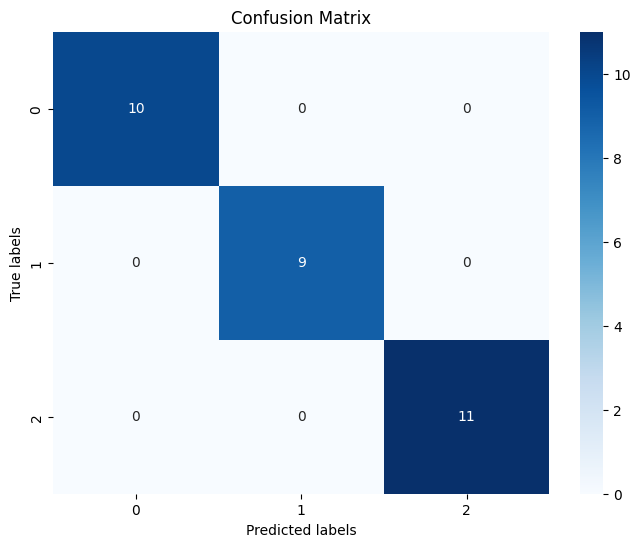

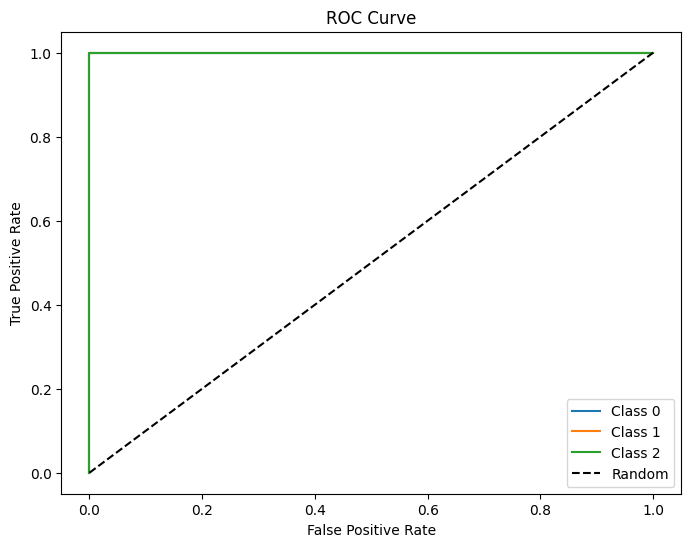

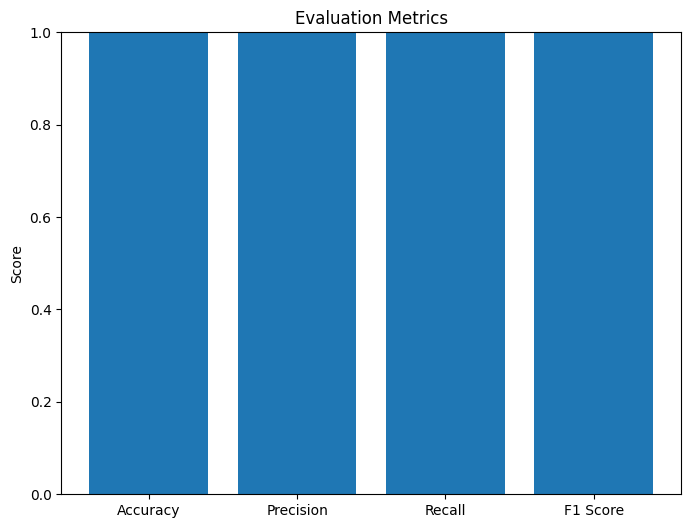

In [20]:
#visuals
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Predicted Iris Species')
plt.colorbar(label='Species')
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



# ROC curve
probs = classifier.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
plt.figure(figsize=(8, 6))
for i in range(3):  # 3 classes in Iris dataset
    fpr, tpr, _ = roc_curve(y_test, probs[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#F1 Score
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy, precision, recall, f1])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.show()